# Homework 5 - Seth Nielsen - ME 537

### Book Problems

**2-6)  Compute the matrix exponential using the power series. How many terms are required to match the result shown to standard MATLAB precision?**

Using trial and error, I found the answer to be 37.


In [ ]:
A = [1 2 3; 4 5 6; 7 8 9]*0.1;

m = eye(3);
for i=1:37
   m = m + (A^i)/factorial(i);
end

expm(A)
m


% Results:

ans =

    1.3732    0.5315    0.6898
    1.0093    2.2481    1.4870
    1.6454    1.9648    3.2843


m =

    1.3732    0.5315    0.6898
    1.0093    2.2481    1.4870
    1.6454    1.9648    3.2843

**2-8) For the 3-dimensional rotation about the vector [2, 3, 4] by 0.5 rad compute an SO(3) rotation matrix using: the matrix exponential functions expm and trexp, Rodrigues’ rotation formula (code this yourself), and the Toolbox function angvec2tr. Compute the equivalent unit quaternion.**


In [ ]:
v = [2 3 4];
th = 0.5;

S = v / norm(v);
s = [0    -S(3) S(2); 
     S(3)    0 -S(1); 
    -S(2)  S(1)   0];

R  = expm( s * th)                         % matrix exponential
R2 = trexp(S, th)                          % trexp function
R3 = eye(3) + sin(th)*s + (1-cos(th))*s^2  % Rodrigues formula
T  = angvec2tr(th, S)                      % angvec2tr
q  = [cos(th/2), S*sin(th/2)]              % unit quaternion [s, v1, v2, v3]


% Results:


R =

    0.8945   -0.3308    0.3009
    0.3814    0.9156   -0.1274
   -0.2333    0.2287    0.9451


R2 =

    0.8945   -0.3308    0.3009
    0.3814    0.9156   -0.1274
   -0.2333    0.2287    0.9451


R3 =

    0.8945   -0.3308    0.3009
    0.3814    0.9156   -0.1274
   -0.2333    0.2287    0.9451


T =

    0.8945   -0.3308    0.3009         0
    0.3814    0.9156   -0.1274         0
   -0.2333    0.2287    0.9451         0
         0         0         0    1.0000


q =

    0.9689    0.0919    0.1378    0.1838


**2-11) Create two different rotation matrices, in 2D or 3D, representing frames $\{A\}$ and $\{B\}$. Determine the rotation matrix $^A{R}_B$ and $^B{R}_A$. Express these as a rotation axis and angle and compare the results. Express these as a twist.**




In [ ]:
R_AB = rotx(0.5) * roty(0.2) * rotz(0.6)
R_BA = R_AB'

[th1, v1] = tr2angvec(R_AB)
[th2, v2] = tr2angvec(R_BA)

tw1 = Twist('R', v1, [0 0 0])
tw2 = Twist('R', v2, [0 0 0])


R_AB =

    0.8089   -0.5534    0.1987
    0.5741    0.6705   -0.4699
    0.1268    0.4941    0.8601


R_BA =

    0.8089    0.5741    0.1268
   -0.5534    0.6705    0.4941
    0.1987   -0.4699    0.8601


th1 =

    0.8369


v1 =

    0.6491    0.0484    0.7592


th2 =

    0.8369


v2 =

   -0.6491   -0.0484   -0.7592

    
tw1 = 
( -0  -0  -0; 0.64908  0.048386  0.75918 )
 
tw2 = 
( -0  -0  -0; -0.64908  -0.048386  -0.75918 )

**2-19) From page 53 show that ${e^x}{e^y} ≠ e^{x+y}$ for the case of matrices. Hint – expand the first
few terms of the exponential series.**

For the two matrices $A$ and $B$, the product ${e^A}{e^B}$ becomes (evaluated to the third term of the exponential series):

\begin{align}
{e^A}{e^B} &= (I+A+\frac{A^2}{2!})(I+B+\frac{B^2}{2!})\\
&= I+A+B+AB+ \frac{A^2+B^2+AB^2+A^2B}{2}
\end{align}

Evaluating $e^{A+B}$ gives:

\begin{align}
e^{A+B} &= I+A+B+\frac{(A+B)^2}{2!}\\
&= I+A+B+AB+\frac{A^2+B^2}{2}\\
&\neq {e^A}{e^B}
\end{align}

**3-7) For a $\texttt{tpoly}$ trajectory from 0 to 1 in 50 steps explore the effects of different initial and final velocities, both positive and negative. Under what circumstances does the quintic polynomial overshoot and why?**

The quintic polynomial overshoots when there is an initial velocity greater than ~0.1 and a final velocity less than ~0.7. This is because the trajectory begins with a positive velocity and the final velocity is not positive enough to send the velocity significantly in the negative direction. 

**3-8) For a $\texttt{lspb}$ trajectory from 0 to 1 in 50 steps explore the effects of specifying the
velocity for the constant velocity segment. What are the minimum and maximum bounds possible?**

I found the bounds to be a min of 0.021 and a max of 0.040 for the constant velocity segment.

**3-9) For a trajectory from 0 to 1 and given a maximum possible velocity of 0.025 compare how many time steps are required for each of the $\texttt{tpoly}$ and $\texttt{lspb}$ trajectories?**

Using an initial and final velocity of zero,

* $\texttt{tpoly}$: 76 steps
* $\texttt{lspb}$: 61 steps

**3-10) Use $\texttt{animate}$ to compare rotational interpolation using quaternions, Euler angles
and roll-pitch-yaw angles. Hint: use the quaternion $\texttt{interp}$ method and $\texttt{mtraj}$.**

I did this problem. I observed that the quaternion interpolation rotated the coordinate frame in a constant fashion around a single axis, while the roll-pitch-yaw angle interpolation caused the frame to spin while also rotating, arriving at the same orientation but using a less direct path.

**3-13) For the $\texttt{mstraj}$ example (page 75)**
* **a) Repeat with different initial and final velocity.**

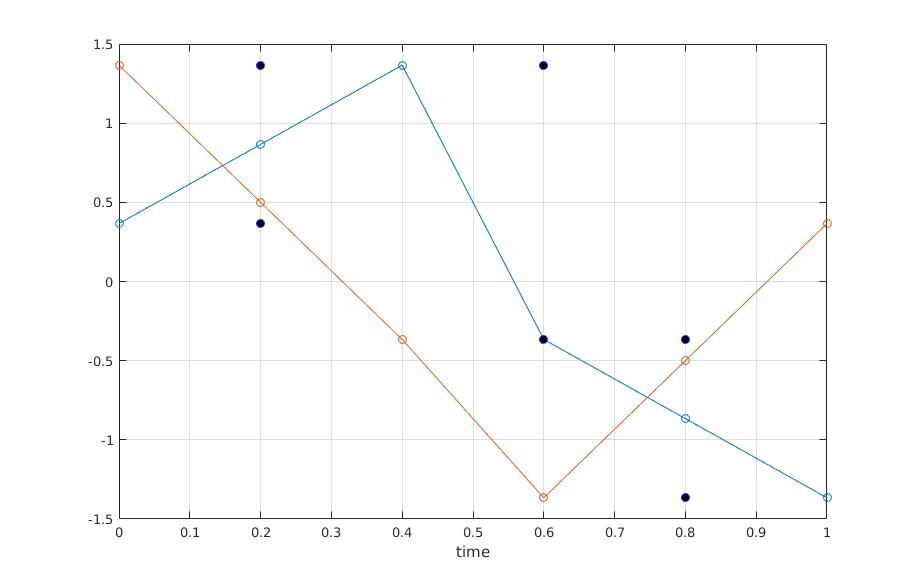

For this trajectory, maximum speeds of [10,8] were chosen.

* **b) Investigate the effect of increasing the acceleration time. Plot total time as a function of acceleration time.**

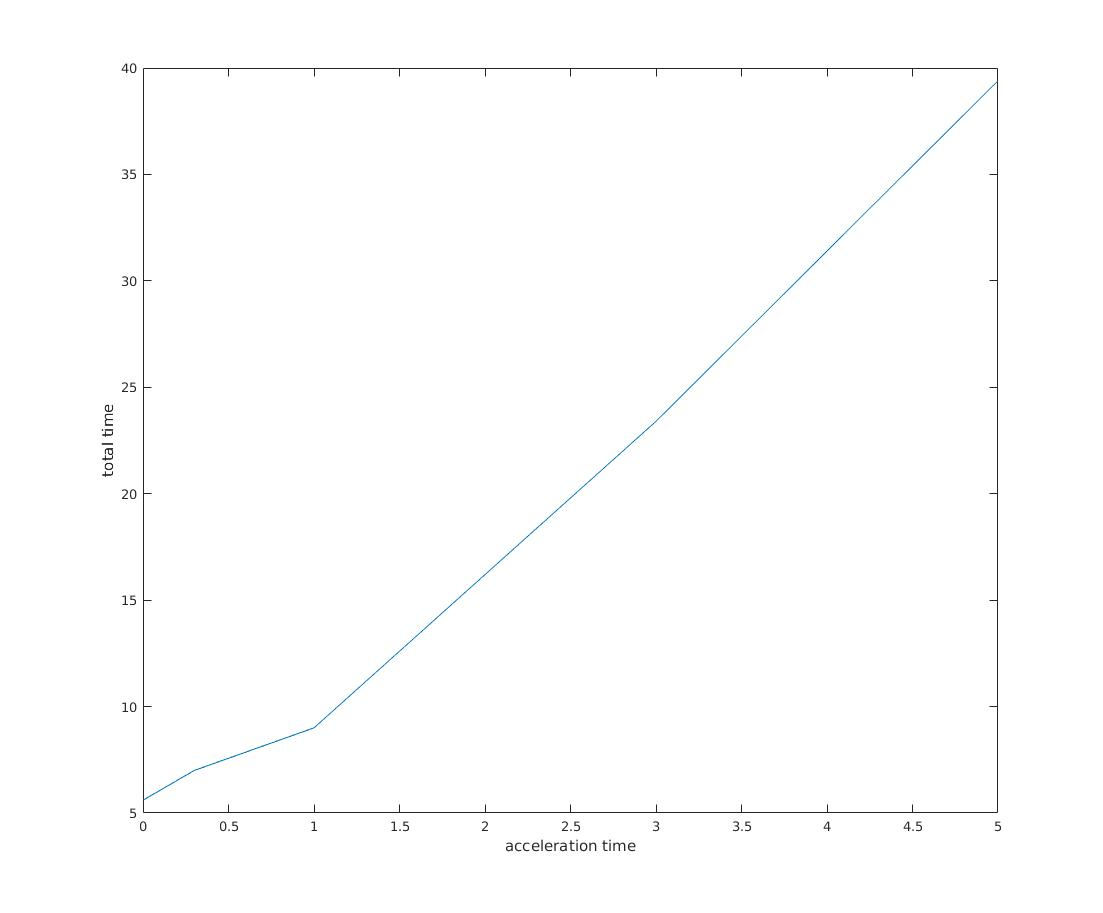

Trials with acceleration times of [0, 0.3, 1, 3, 5] were ran, yielding total times of [5.6, 7, 9, 23.4, 39.4].


**7-4) Compare the solutions generated by $\texttt{ikine6s}$ and $\texttt{ikine}$ for the Puma 560 robot at different poses. Is there any difference in accuracy? How much slower is $\texttt{ikine}$?**

Yes, $\texttt{ikine6s}$ was found to have better accuracy when comparing the error of the input homogeneous matrix minus the homogenous matrix given by $\texttt{fkine}$ on the output joint angles. 

MATLAB's $\texttt{timeit}$ function measured $\texttt{ikine6s}$ to execute in 0.0075 seconds, while $\texttt{ikine}$ took 0.0496. That amounts to being ~6.5 times slower.

### Other Problems

2) Verify the following equation by direct calculation:

\begin{equation}
[\omega]_{\times} p = \omega\times{p}
\end{equation}


In [ ]:
omega = [1,2,3]';
S = skew(omega);
p = [2,3,4]';

a = S * p
b = cross(omega,p)


a =

    -1
     2
    -1


b =

    -1
     2
    -1

The values of $a$ and $b$ are equivalent.

3) Show that $\frac{d}{dt}R = [\omega]_\times R$ for the specific case.

\begin{align}
R &= R_{z,\psi} R_{y,\theta} R_{z,\phi} = ABC \\
\frac{d}{dt}R &= \dot{A}BC + A\dot{B}C + AB\dot{C} \\
&= \frac{d}{d\psi}A\dot{\psi}BC + A \frac{d}{d\theta}B\dot{\theta}C + AB\frac{d}{d\phi}C\dot{\phi} \\
&= \begin{bmatrix}0\\0\\1\end{bmatrix}_\times A\dot{\psi}BC + 
    A \begin{bmatrix}0\\1\\0\end{bmatrix}_\times B\dot{\theta}C + 
    AB \begin{bmatrix}0\\0\\1\end{bmatrix}_\times C\dot{\phi}
\end{align}

In [ ]:
psi = 0.1;
tha = 0.2;
phi = 0.3;
psid = 0.4;
thad = 0.5;
phid = 0.6;

A = rotz(psi);
B = roty(tha);
C = rotz(phi);

R = A*B*C;
omega = [cos(psi)*sin(tha)*phid - sin(psi)*thad, ...
         sin(psi)*sin(tha)*phid + cos(psi)*thad, ...
         psid + cos(tha)*phid];
       
Sz = skew([0 0 1]);
Sy = skew([0 1 0]);
Sw = skew(omega);

Rdot  = psid*Sz*A*B*C + A*thad*Sy*B*C + A*B*phid*Sz*C 
Rdot2 = Sw * R 

Rdot =

   -0.4796   -0.8807    0.4797
    0.9044   -0.3830    0.1280
   -0.4329    0.2587   -0.0993


Rdot2 =

   -0.4796   -0.8807    0.4797
    0.9044   -0.3830    0.1280
   -0.4329    0.2587   -0.0993